Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

This project aim to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### EDA

In [52]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [53]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [144]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


6 continuous features, 4 categorical features (excluding the target) and 3 descriptive/qualitative features.

In [82]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RoomService       4195 non-null   float64
 1   FoodCourt         4171 non-null   float64
 2   ShoppingMall      4179 non-null   float64
 3   Spa               4176 non-null   float64
 4   VRDeck            4197 non-null   float64
 5   CryoSleep_lable   4277 non-null   int32  
 6   Cabin_deck_lable  4277 non-null   int32  
dtypes: float64(5), int32(2)
memory usage: 200.6 KB


In [166]:
train_data.nunique()

RoomService          1093
FoodCourt            1293
ShoppingMall          984
Spa                  1143
VRDeck               1106
CryoSleep_lable         2
Transported_lable       2
Cabin_deck_lable        8
dtype: int64

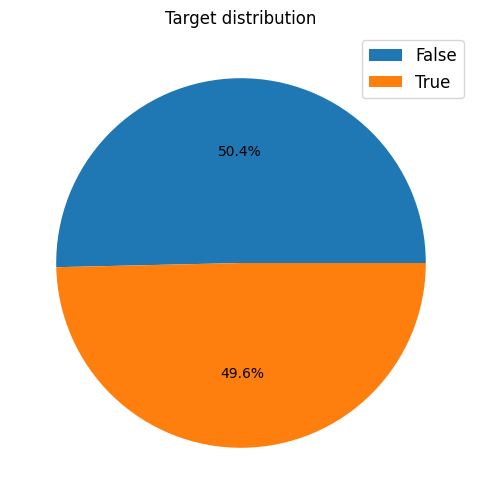

In [5]:
plt.figure(figsize=(6,6))
plt.pie(train_data["Transported"].value_counts(), autopct='%1.1f%%')
plt.title("Target distribution")
plt.legend(train_data["Transported"], fontsize=12)

### Continuous features

`kde=True` 表示是否在直方圖上繪製核密度估計（Kernel Density Estimation，KDE）。核密度估計用於估計隨機變量的概率密度函數。當 kde=True 時，將在直方圖的背景上繪製一條核密度估計曲線，以更好地理解數據的分佈特性。

Text(0.5, 0, 'Age (years)')

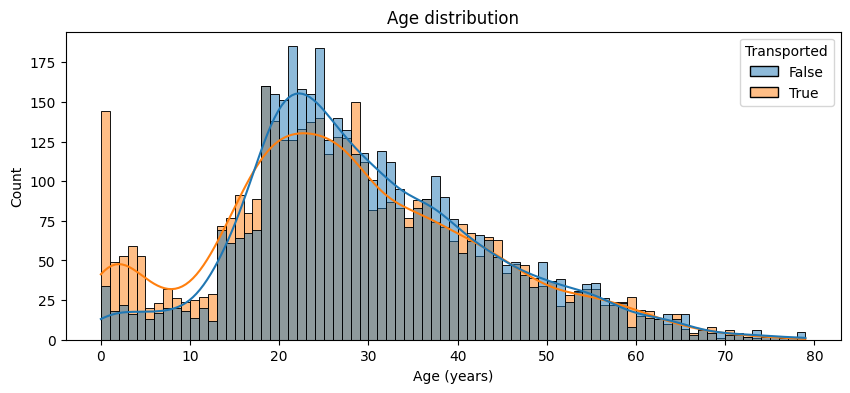

In [6]:
# Figure size
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=train_data, x='Age', hue='Transported', binwidth=1, kde=True)

# Aesthetics
plt.title('Age distribution')
plt.xlabel('Age (years)')

- Age 0-18 are more likely to be transported
- Age 20-32 are less likely to be transported

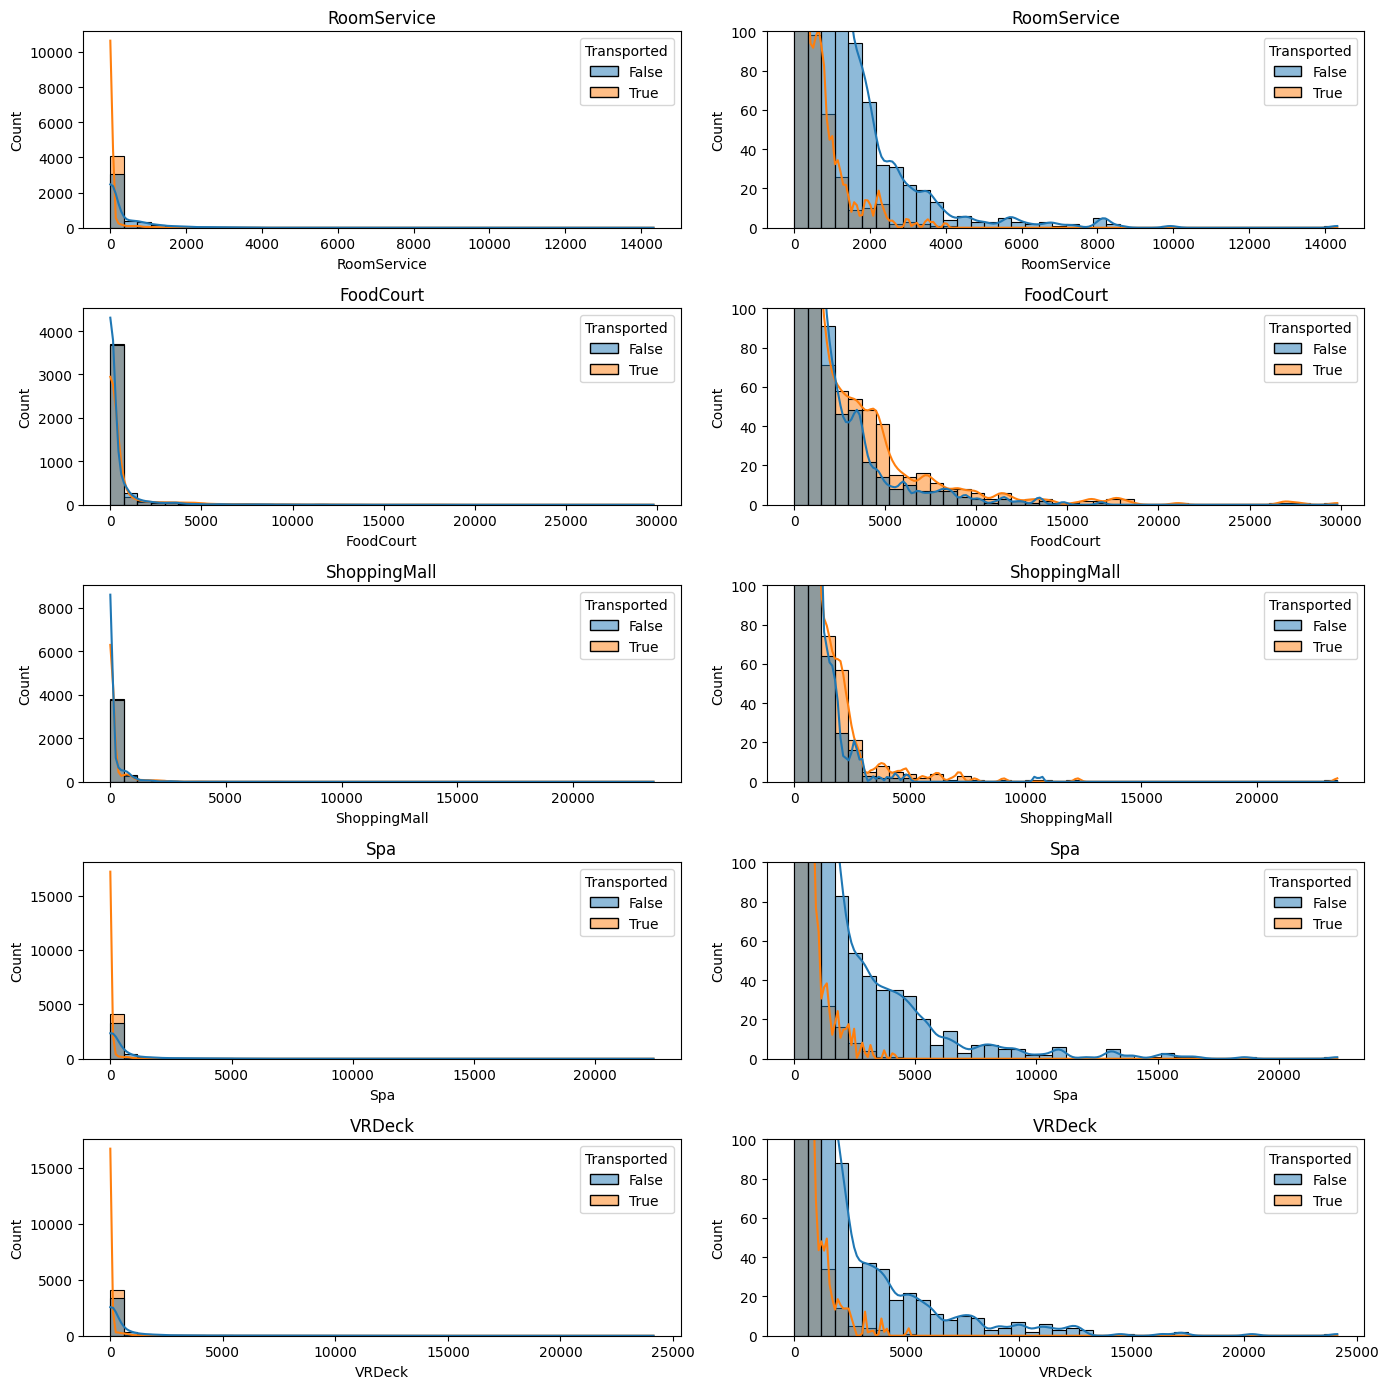

In [7]:
spending = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig, axes = plt.subplots(5, 2, figsize=(14, 14))

# 展平子圖陣列
axes = axes.flatten() #二維陣列才需要 (5, 2)

for i in range(len(spending)):
    sns.histplot(data=train_data, x=spending[i], hue='Transported', bins=40, kde=True, ax=axes[2*i])
    axes[2*i].set_title(spending[i])  
    #在 axes 陣列中，每個子圖的索引都對應著其在圖中的位置。對於第 i 個項目，左邊的子圖位於 2*i 的位置，右邊的子圖位於 2*i+1 的位置。

    sns.histplot(data=train_data, x=spending[i], hue='Transported', bins=40, kde=True, ax=axes[2*i+1])
    axes[2*i+1].set_title(spending[i]) 
    axes[2*i+1].set_ylim([0, 100])  # 只對右邊的子圖設置 ylim

plt.tight_layout()  # 調整子圖之間的間距
plt.show()



- Group1(Foodcourt, Shoppingmall) has the different distribution form group2(Vr, Spa, Roomservice)
- People who spent a lot in group 2 barely got transported, but the amount is very little
- Most people spent 0 money
- Most people spent little money

### Categorical features

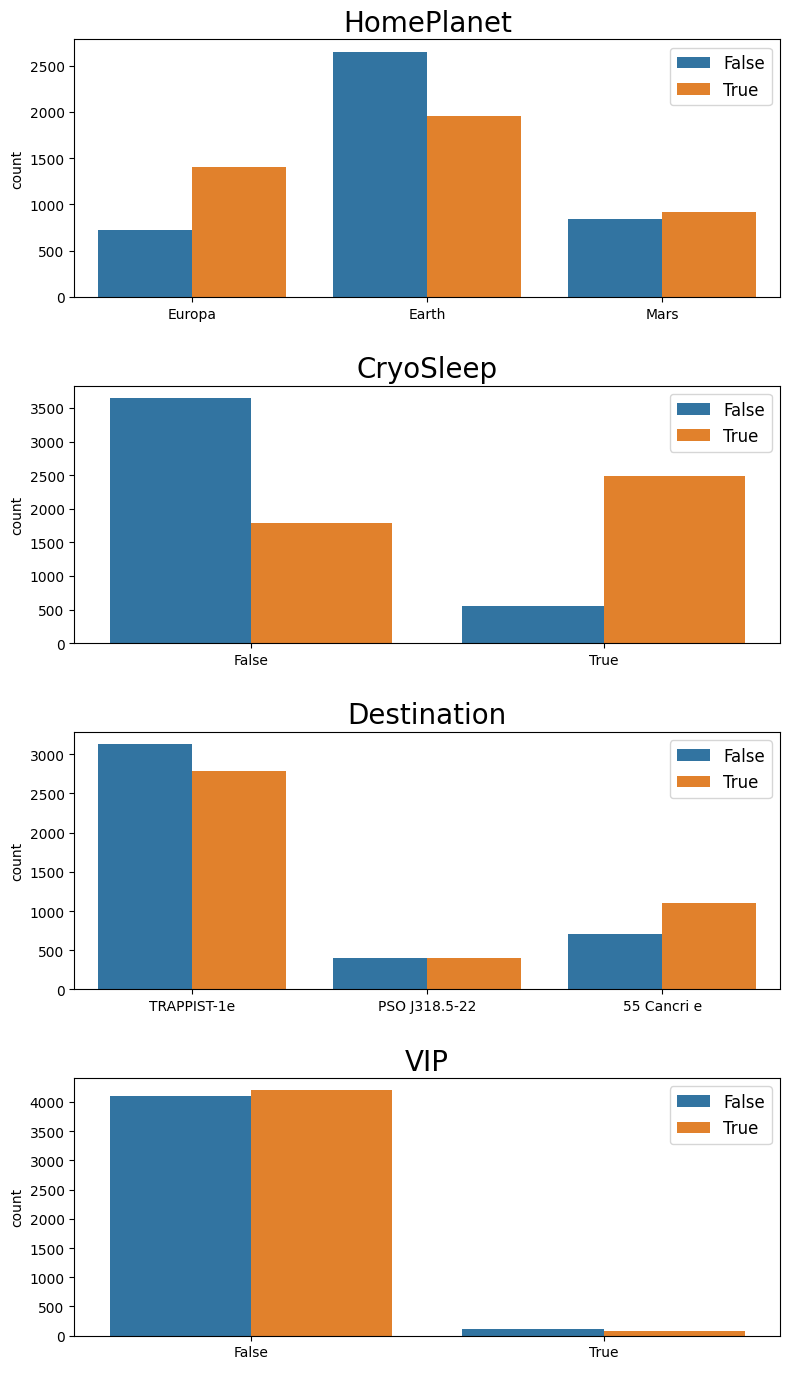

In [8]:
cat_feats = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig, axes = plt.subplots(4, 1, figsize=(8, 14))

for i in range(len(cat_feats)):
    sns.countplot(data=train_data, x=cat_feats[i], ax=axes[i], hue="Transported") #每一個axes都是一個子圖
    axes[i].set_title(cat_feats[i], fontsize=20)  
    axes[i].set_xlabel(" ")

for ax in axes:
    ax.legend(loc='upper right', fontsize=12)
   


plt.tight_layout() 
plt.show()


- Most people are not VIP
- VIP seems not a very good feature because the amount of VIP is too small
- Cryosleep seems like an important factor determing the transportation or not

### Preprocessing

### Missing Value

In [35]:
missing_value = pd.DataFrame()
missing_value["Num_missing"] = train_data.isnull().sum()
missing_value["%_missing"] = np.round(100*missing_value['Num_missing']/len(train_data),2)
missing_value


,Num_missing,%_missing
PassengerId,0,0.00
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39


In [37]:
train_data.shape[0]

8693

In [54]:
con_data = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
cat_data = ["HomePlanet", "CryoSleep", "Destination", "VIP"]
dis_data = ["Name", "Cabin"]

# for continuous data, fill with median
median_values = train_data[con_data].median()
train_data[con_data] = train_data[con_data].fillna(median_values)

#for catogorical data, fill with mode
mode_values = train_data[cat_data].mode().iloc[0] #眾數有可能有多個值，取第一個
train_data[cat_data] = train_data[cat_data].fillna(mode_values)

train_data.dropna(inplace=True)



In [39]:
train_data.shape[0]

8296

### Feature Engineering

- Lable the catogorical feature

In [55]:
#label encoder
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to the data
label_encoder.fit(train_data['HomePlanet']) #要將HomePlanet進行編碼

# Transform the data
train_data['HomePlanet_lable'] = label_encoder.transform(train_data['HomePlanet'])

#repeat the transformation for the catogorical data
label_encoder.fit(train_data['CryoSleep'])
train_data['CryoSleep_lable'] = label_encoder.transform(train_data['CryoSleep'])

label_encoder.fit(train_data['Destination'])
train_data['Destination_lable'] = label_encoder.transform(train_data['Destination'])

label_encoder.fit(train_data['VIP'])
train_data['VIP_lable'] = label_encoder.transform(train_data['VIP'])

label_encoder.fit(train_data['Transported'])
train_data['Transported_lable'] = label_encoder.transform(train_data['Transported'])

label_encoder.fit(train_data['Cabin'].str[-1]) #要將cabin最後一個值進行編碼
train_data["Cabin_side_lable"] = label_encoder.transform(train_data['Cabin'].str[-1])

label_encoder.fit(train_data['Cabin'].str[0]) 
train_data["Cabin_deck_lable"] = label_encoder.transform(train_data['Cabin'].str[0])


In [41]:
pd.set_option('display.max_columns', None)
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_lable,CryoSleep_lable,Destination_lable,VIP_lable,Transported_lable,Cabin_side_lable,Cabin_deck_lable
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0,2,0,0,0,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,0,2,0,1,1,5
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,0,2,1,0,1,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,0,2,0,0,1,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,0,2,0,1,1,5


In [56]:
# Do the same for the test data
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to the data
label_encoder.fit(test_data['HomePlanet'])

# Transform the data
test_data['HomePlanet_lable'] = label_encoder.transform(test_data['HomePlanet'])

#repeat the transformation for the catogorical data
label_encoder.fit(test_data['CryoSleep'])
test_data['CryoSleep_lable'] = label_encoder.transform(test_data['CryoSleep'])

label_encoder.fit(test_data['Destination'])
test_data['Destination_lable'] = label_encoder.transform(test_data['Destination'])

label_encoder.fit(test_data['VIP'])
test_data['VIP_lable'] = label_encoder.transform(test_data['VIP'])

label_encoder.fit(test_data['Cabin'].str[-1]) #要將cabin最後一個值進行編碼
test_data["Cabin_side_lable"] = label_encoder.transform(test_data['Cabin'].str[-1])

label_encoder.fit(test_data['Cabin'].str[0]) 
test_data["Cabin_deck_lable"] = label_encoder.transform(test_data['Cabin'].str[0])



- Grouoing the Age

In [57]:
#feature engineering by myself
data = [train_data, test_data]
for dataset in data:

     # Extract An AgeGroup from the Age column
    dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=[0, 12, 18, 60, np.inf], labels=['Child', 'Teenager', 'Adult', 'Senior']) #np.inf 表示無限大

    #lable age group
    label_encoder.fit(dataset['AgeGroup']) 
    dataset["AgeGroup_lable"] = label_encoder.transform(dataset['AgeGroup'])

 



In [44]:
train_data["Cabin_deck_lable"].unique()


array([1, 5, 0, 6, 4, 2, 3, 7])

In [58]:
drop_column = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'AgeGroup', 'Name', 'Age', 'PassengerId']

for dataset in data:
    dataset.drop(columns=drop_column, inplace=True)

train_data.drop(columns=["Transported"], inplace=True)



In [153]:
train_data.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_lable,CryoSleep_lable,Destination_lable,VIP_lable,Transported_lable,Cabin_side_lable,Cabin_deck_lable,CryoSleep_VIP,AgeGroup_lable
0,0.0,0.0,0.0,0.0,0.0,1,0,2,0,0,0,1,0,0
1,109.0,9.0,25.0,549.0,44.0,0,0,2,0,1,1,5,0,0
2,43.0,3576.0,0.0,6715.0,49.0,1,0,2,1,0,1,0,0,0
3,0.0,1283.0,371.0,3329.0,193.0,1,0,2,0,0,1,0,0,0
4,303.0,70.0,151.0,565.0,2.0,0,0,2,0,1,1,5,0,3


In [154]:
test_data.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_lable,CryoSleep_lable,Destination_lable,VIP_lable,Cabin_side_lable,Cabin_deck_lable,CryoSleep_VIP,AgeGroup_lable
0,0.0,0.0,0.0,0.0,0.0,0,1,2,0,1,6,0,0
1,0.0,9.0,0.0,2823.0,0.0,0,0,2,0,1,5,0,0
2,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1,2,0,0
3,0.0,6652.0,0.0,181.0,585.0,1,0,2,0,1,2,0,0
4,10.0,0.0,635.0,0.0,0.0,0,0,2,0,1,5,0,0


### Model Traning & Model Evaluation


In [59]:
# split the train_data into features and target
X = train_data.drop(columns="Transported_lable")
y = train_data["Transported_lable"].astype(int)

from sklearn.model_selection import train_test_split

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #0.2 -> 20% 0f the data are test set


- Use Random Forest to do the training

In [84]:
#use ramdom forest algorithm to do the classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42, max_features=6, min_samples_split=2, min_samples_leaf=1)

# Train the model
random_forest.fit(X_train, y_train) #x_train -> array of features; y_train -> array of target var value

# Make predictions
predictions = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# You can also print classification report for detailed evaluation
print("Classification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.7837349397590362
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       837
           1       0.74      0.86      0.80       823

    accuracy                           0.78      1660
   macro avg       0.79      0.78      0.78      1660
weighted avg       0.79      0.78      0.78      1660

[0 0 0 ... 1 1 1]


In [85]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier instance
rf = RandomForestClassifier(random_state=42)

# Setup the RandomizedSearchCV instance
random_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=0, n_jobs=-1)

# Fit the RandomizedSearchCV instance to the data
random_search.fit(X, y)

# Print the best parameters and the corresponding score
print(f"Best parameters:\n {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

# Retrieve the best estimator
best_rf = random_search.best_estimator_

Best parameters:
 {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}
Best score: 0.7953236514866434


In [86]:
# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=200, random_state=42, max_features=10, min_samples_split=6, min_samples_leaf=1)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions
predictions = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# You can also print classification report for detailed evaluation
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.7867469879518072
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       837
           1       0.75      0.86      0.80       823

    accuracy                           0.79      1660
   macro avg       0.79      0.79      0.79      1660
weighted avg       0.79      0.79      0.79      1660



### Result

951 709


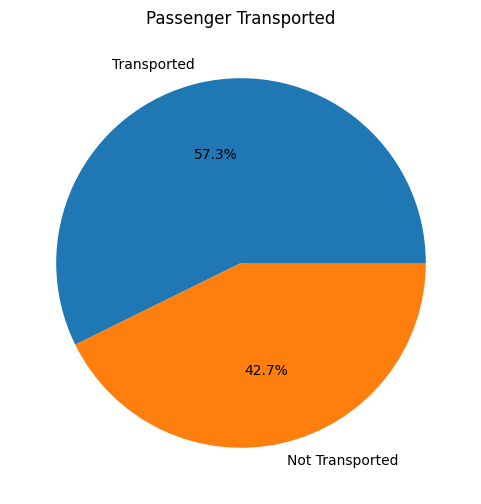

In [87]:
y_pred = random_forest.predict(X_test)
num_ones = sum(y_pred == 1)
num_zeros = sum(y_pred == 0)
print(num_ones, num_zeros)

labels = ['Transported', 'Not Transported']
sizes = [num_ones, num_zeros]

# 繪製圓餅圖
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Passenger Transported")
plt.show()


In [64]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importances

,Feature,Importance
6,CryoSleep_lable,0.172785
3,Spa,0.152050
0,RoomService,0.147053
4,VRDeck,0.139831
1,FoodCourt,0.106952
2,ShoppingMall,0.087724
10,Cabin_deck_lable,0.076275
5,HomePlanet_lable,0.054030
11,AgeGroup_lable,0.023974
9,Cabin_side_lable,0.019010


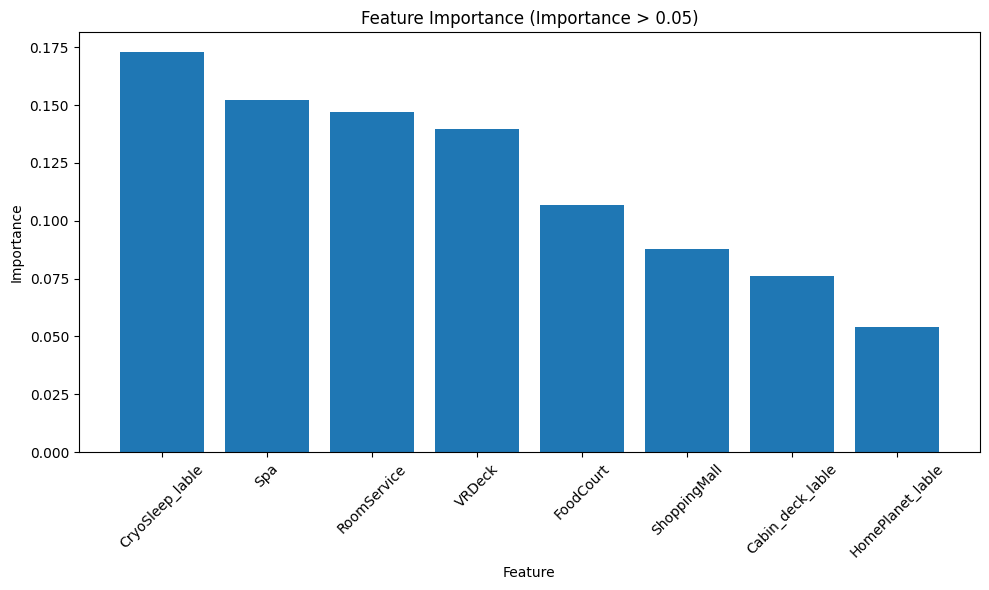

In [104]:
feature_importances.reset_index(drop=True, inplace=True) #drop=True：丟棄原來的索引

feature_importances_overpointfive = feature_importances.loc[0:7]
plt.figure(figsize=(10, 6))
plt.bar(feature_importances_overpointfive['Feature'], feature_importances_overpointfive['Importance'])
plt.title('Feature Importance (Importance > 0.05)')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)  # 將 x 軸標籤進行旋轉以避免重疊
plt.tight_layout()



- Around 57% of the passengers will be transported.

- Cryosleep is the most important feature, and all the spending features are also important.